## **A Case Study on Hypothesis Testing**

Ankur and his friend want to perform a hypothesis testing on the dataset to make decisions about if one hypothesis is true or false on the basis of different attributes. The idea behind this analysis is to check which attribute contributes to a particular hypothesis.

# Introduction

A statistical hypothesis test is a statistical inference process used to examine if the information available supports a certain hypothesis. We can make probabilistic claims regarding population parameters thanks to hypothesis testing. Hypothesis testing is a key tool in statistics. A hypothesis test compares two mutually incompatible concepts about a population to see which one is supported by the sample data. A hypothesis test assesses whether or not a finding is statistically significant.


# Describing the dataset

The dataset includes data on policyholders with characteristics like policy tenure, age of the car, age of the owner, population density of the city, make and model of the car, power, engine type, etc., as well as the target variable indicating whether or not the policyholder files a claim in the upcoming six months. Access the dataset : [nutrition data](https://drive.google.com/file/d/1ztFeilEMGgEIEkAfPAplfDUIwqtLp_2z/view?usp=share_link) <br>

**policy_id :** Unique identifier of the policyholder<br>
**policy_tenure :** Time period of the policy<br>
**age_of_car :** Normalised age of car in years<br>
**age_of_policyholder :** Normalised age of policyholder in years<br>
**area_cluster :** Area cluster of the policyholder<br>
**population_density :** Population density of the city(Policyholder City)<br>
**make :** Encoded Manufacturer/Company of the car<br>
**segment :**Segment of the car(A/ B1/B2/ C1/ C2)<br>
**model :** Encoded name of the car<br>
**fuel_type :** Type of fuel used by the car<br>
**max_torque :** Maximum torque generated by Car(Nm@rpm)<br>
**max_power :** Maximum power generated by Car(Nm@rpm)<br>
**engine_type :** Type of engine used in the car<br>
**airbags :** Number of airbags user in the car<br>
**is_esc :** Boolean flag indicating whether Electronic Stability Control (ESC) is present in the car or not.<br>
**is_adjustable_steering :** Boolean flag indicating whether the steering wheel of the car is adjustable or not.<br>
**is_tpms :** Boolean flag indicating whether Tyre Pressure Monitoring System (TPMS) is present in the car or not.<br>
**is_parking_sensors :** Boolean flag indicating whether parking sensors are present in the car or not.<br>
**is_parking_camera :** Boolean flag indicating whether the parking camera is present in the car or not.<br>
**rear_brakes_type :** Type of brakes used in the rear of the car<br>
**displacement :** Engine displacement of the car (cc)<br>
**cylinder :** Number of cylinders present in the engine of the car<br>
**transmission_type :** Transmission type of the car<br>
**gear_box :** Number of gears in the car<br>
**steering_type :** Type of the power steering present in the car<br>
**turning_radius :** The space a vehicle needs to make a certain turn (Meters)<br>
**length :** Length of the car (Millimetre)<br>
**width :** Width of the car (Millimetre)<br>
**height :** Height of the car (Millimetre)<br>
**gross_weight :** The maximum allowable weight of the fully-loaded car, including passengers, cargo and equipment (Kg)<br>
**is_front_fog_lights :** Boolean flag indicating whether front fog lights are available in the car or not.<br>
**is_rear_window_wiper :** Boolean flag indicating whether the rear window wiper is available in the car or not.<br>
**is_rear_window_washer :** Boolean flag indicating whether the rear window washer is available in the car or not.<br>
**is_rear_window_defogger :** Boolean flag indicating whether rear window defogger is available in the car or not.<br>
**is_brake_assist :** Boolean flag indicating whether the brake assistance feature is available in the car or not.<br>
**is_power_door_locks :** Boolean flag indicating whether a power door lock is available in the car or not.<br>
**is_central_locking :** Boolean flag indicating whether the central locking feature is available in the car or not.<br>
**is_power_steering :** Boolean flag indicating whether power steering is available in the car or not.<br>
**is_driver_seat_height_adjustable :** Boolean flag indicating whether the height of the driver seat is adjustable or not.<br>
**is_day_night_rear_view_mirror :** Boolean flag indicating whether day & night rearview mirror is present in the car or not.<br>
**is_ecw :** Boolean flag indicating whether Engine Check Warning (ECW) is available in the car or not.<br>
**is_speed_alert :** Boolean flag indicating whether the speed alert system is available in the car or not.<br>
**ncap_rating :** Safety rating given by NCAP (out of 5)<br>

<br>

**Target Variable**

**is_claim :** Outcome: Boolean flag indicating whether the policyholder file a claim in the next 6 months or not.<br>







## Table of Content

1. **[Import Libraries](#a1)**
2. **[Data Preparation](#a2)**
    - 2.1 - **[Understand the Data](#a3)**
    - 2.2 - **[Correlation](#a4)**
    - 2.3 - **[Remove Insignificant Variables](#a5)**
    - 2.4 - **[Missing Value Analysis and Treatment](#a6)**
 
3. **[Hypothesis Testing](#a7)**
    - 3.1 - **[Introduction](#a8)**
    - 3.2 - **[Terminologies](#a9)**
    - 3.3 - **[Steps](#a10)**

4. **[Types of Hypothesis Testing](#a11)** 
    - 4.1 - **[Parametric Testing](#a12)**
       - 4.1.1 - **[Chi Square Test](#a13)**
       - 4.1.2 - **[Sample t-test](#a14)**
       - 4.1.3 - **[Anova Testing](#a15)**
    - 4.2 - **[Non-Parametric Testing](#a16)** 
       - 4.2.1 - **[Chi Square Testing](#a17)**



<a id="a1"></a>
# 1. Import Libraries


Here We are importing the libraries that are used in the code.<br>
The following libraries are imported.<br>
Pandas : For Data Manuplation<br>
scipy : It provides more utility functions for optimization, stats and signal processing. <br>

In [ ]:
import pandas as pd
import numpy as np

from scipy import stats
from scipy.stats import ttest_ind

# python libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

!pip install bioinfokit #we are installing bioinfokit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<a id="a2"></a>
# 2. Data Preparation

<br>

<a id="a3"></a>
## 2.1 Understand the Data

**Loading the the dataset**
 
You can load dataframe using `read_csv()` method from pandas.

In [ ]:
df = pd.read_csv('Car Insurance Claim.csv')
df

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,ID58589,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58589,ID58590,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58590,ID58591,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [ ]:
df.shape

(58592, 44)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [ ]:
df.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


In [ ]:
# here we are splitting the maximum torque and speed into different columns
df[['max_torq','s1']] = df.max_torque.str.split("@",expand=True)
df[['max_pow','s2']] = df.max_power.str.split("@",expand=True)


In [ ]:
# Removing the unit string from all rows
df["max_torq"]=df["max_torq"].str.replace("[Nm]","")
df["max_pow"]=df["max_pow"].str.replace("[bhp]","")
df["s1"]=df["s1"].str.replace("[rpm]","")
df["s2"]=df["s2"].str.replace("[rpm]","")

<ipython-input-9-7024c9a846a5>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["max_torq"]=df["max_torq"].str.replace("[Nm]","")
<ipython-input-9-7024c9a846a5>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df["max_pow"]=df["max_pow"].str.replace("[bhp]","")
<ipython-input-9-7024c9a846a5>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df["s1"]=df["s1"].str.replace("[rpm]","")
<ipython-input-9-7024c9a846a5>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df["s2"]=df["s2"].str.replace("[rpm]","")


In [ ]:
# Droping the columns
df.drop(['max_torque','max_power'],axis=1,inplace=True)

In [ ]:
# Changing the datatype of the columns from object to float
df[['max_torq']] = df[['max_torq']].astype(np.float32)
df[['max_pow']] = df[['max_pow']].astype(np.float32)
df[['s1']] = df[['s1']].astype(np.float32)
df[['s2']] = df[['s2']].astype(np.float32)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  engine_type                       58592 non-null  object 
 11  airbags                           58592 non-null  int64  
 12  is_e

<a id="a4"></a>
## 2.2 Correlation

Finding the correlation between different features

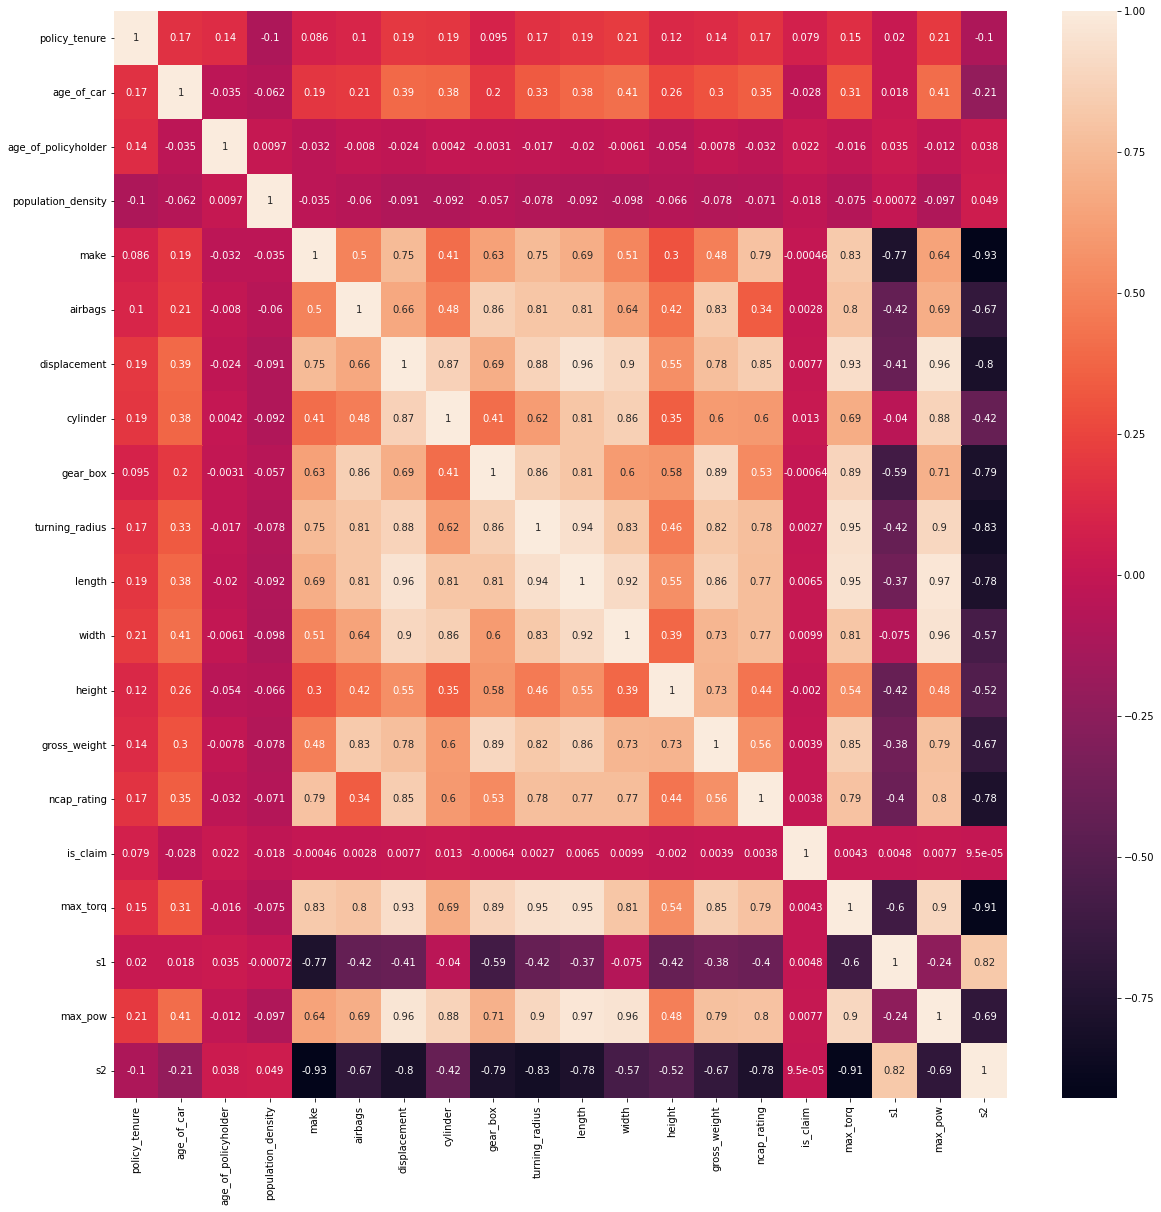

In [ ]:
# Visualizing the correlation between data, using matplotlib and seaborn
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot = True)

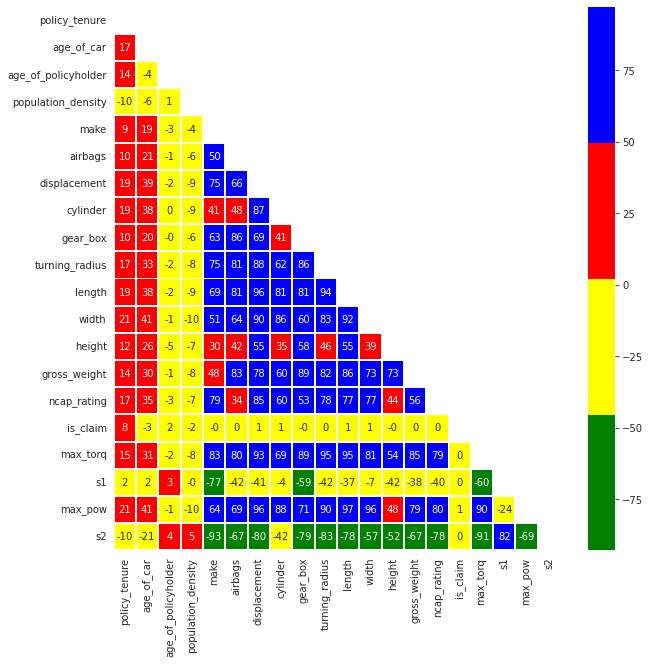

In [ ]:
# using a more descriptive correlation chart
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr()*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red','blue']))
  

The column `age_of_policyholder  ` appears to be inconsequential


<a id="a5"></a>
## 2.3 Remove Insignificant Variables


you can drop columns usning `drop()` method.

You can read more about it on <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html">This Link </a>

By dropping uncessary columns we can make statistical analyis esay and efficent.

In [ ]:
df.drop(['age_of_policyholder'],axis=1,inplace=True)

<a id="a6"></a>
## 2.4 Missing Value Analysis and Treatment

You can check for the duplicate and null values by method called as `duplicated()` and `isna()`.

You can read more about on <a href="https://pythontic.com/pandas/dataframe-manipulations/duplicates-and-missing-values#:~:text=The%20drop_duplicates()%20method%20removes,with%20the%20parameter%20%22keep%22."> This link</a>.

In [ ]:
df.isna().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length                              0
width                               0
height                              0
gross_weight

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dropna(inplace=True,axis=0)

We can remove the null and duplicated values from the dataset because Datasets that contain duplicates may contaminate the statical analysis of the dataset and Entries with missing values will lead this analysis to misunderstand features, and outliers will undermine during analysis.

<a id="a7"></a>
# 3. Hypothesis Testing

<a id="a8"></a>
## 3.1 Introduction

Hypothesis testing is a technique that assists scientists, researchers, and anyone else in assessing the validity of their assertions or hypotheses concerning real-world or real-life occurrences. Hypothesis testing approaches are frequently used in statistics and data science to determine if assertions about the occurrence of events are accurate, whether the findings produced by machine learning model performance metrics are reflective of the models, or whether they occurred by coincidence.We will go through some of the fundamental statistical ideas, including methods and examples of what hypothesis testing is and how to create it. Understanding hypothesis formulation and hypothesis testing is essential for establishing truth about hypotheses and modifying business procedures for optimum business effect.





<a id="a9"></a>
## 3.2 Terminologies :  

**Null hypothesis :** <br>
The null hypothesis is a broad statement or default stance in inferential statistics that there is no link between two measurable phenomena or no correlation between groups. In other terms, it is a fundamental assumption or assumption based on domain or problem expertise.

**Alternative hypothesis :**<br>
In hypothesis testing, the alternative hypothesis is the hypothesis that is opposed to the null hypothesis. It is often assumed that the observations are the consequence of a real effect (with some amount of chance variation superposed).

**Example :** <br>
Null Hypothesis :  a company production is = 15 unit/per day etc. 
Alternative Hypothesis : a company production is != 15 unit/per day etc.

**Significance** <br>
In simple terms, significance can be defined as the measure of confidence with which we can reject a Hypothesis. With significance we can determine whether the output of a hypothesis is significant or not in terms of statistics.

The level of Significance is also called the alpha level. Level of significance can help us reduce the likelihood of making Type I errors. Type I errors are those errors where we mistakenly reject the null hypothesis, or in simpler terms it is the error of classifying as false positive.

Generally level of significance is take to be 0.5. This however can change according to the situation and data under study. If we keep the value of level of significance lower, the chances of making Type I error also decreases. However we must be vary as, too low a value for level of significance will increase the chances of Type II error (i.e. mistakenly failing to reject null hypothesis).

The outcome of significance is determined using p_value

**Calculating test statistics** <br>
As discussed earlier,  Hypothesis testing is a technique that can help test the validity of assumptions and assertions made by us. To actually test these assumptions we utilize various statistical tests. These test help us decide when to reject or fail to reject any null hypothesis. These test measure the accuracy of predicted distribution with the null hypothesis.


- z-value:
  This is another statistical test where null hypothesis suggest the mean of two populations are equal. This is a more comprehensive and detailed test as it goes a step further than t-value by testing the entire population. Z-value can also ascertain the probability of a data point to appear in the normal distribution

- f-vlaue:
  This test statistic is used in Analysis of Variance (ANOVA). Here we measure the difference between the meas of different independent samples. f-values statistic displays the significance  of the differences between means, to showcase the relationship between variance among the groups.
  The null hypothesis is rejected, if f-value is lower than the variation between samples. Whereas null hypothesis is failed to be rejected if f-value is higher than the variation.
  
- X2(chi square) value:
  It is a non-parametric correlation test. It aims to calculate if there's a causal relationship among the variables. We can also use it to find if the two variables we wish to use in a statistical analysis are already correlated or not. It is most useful for preparing variables for testing in regression analysis

**Note:** Degree of Freedom = Sample Size - 1 From T table the value will be -1.699. After comparison, it is clear that the statistics obtained fall short of those with the acceptable degree of significance. So we can reject the claim made. You can calculate the t value using stats.t.ppf() function of stats class of scipy library. 

**Errors :**<br>
Due to a lack of data resources, hypothesis testing is conducted on a sample of data rather than the complete population. The hypothesis testing can result in mistakes that can be divided into two categories due to inferences being taken from sample data:

Type I Error: In this error, we reject the null hypothesis when it is true. <br>
Type II Error: In this error, we fail to reject the null hypothesis when it is false.



<a id="a10"></a>
## 3.3 Steps


Steps

The steps involved in hypothesis testing are as below:


1. Specify the Null Hypothesis 
2. Specify the Alternative Hypothesis 
3. Set the Significance Level 
4. Calculate the Test Statistic and Corresponding p-Value 
5. Drawing a Conclusion



# Types of Hypothesis Testing
- Parameteric 
    - z test
    - T- test
    - F- test
    - Anova Test
- Non Parameteric
    - Chi-square Testing
    - Mann-Whitney U-test
    - Kruskal-Wallis H-test
    - Sign Test<br>
* Here for detailed analysis we will consider Z-test , T-test, Annova Test and Chi-square Testing, 

<a id="a11"></a>
## 4.1 Parametric Testing
Parametric Testing form its basis on assumptions on shape of the distribution and form of assumed distribution's paramters.
<br>

Tests classified as parametric are those for which we already know the population distribution (i.e., a normal distribution), or, if not, for which we can quickly approximate a normal distribution using the Central Limit Theorem.

### Z-test

* It is a parametric test of hypothesis testing.
* When the population variance is known and the sample size is large, it is utilised to determine whether the means are different.
* The Z test involves determining the P-value and then verifying how close the determined P value is close to the significance value which is considered. Usually, the significance value is around 0.05.
* When the Z test must be run depends on the size of the sample that was used. This indicates that the Z test is chosen whenever the sample size is greater than 30 records. Therefore, the sample size is important in determining the Z test. The t-test is favoured over the Z test when there are fewer than 30 sample records involved.

**Question:**  The average wieight of a car in any group in this dataset is close to 1380.

**Step 1:** Define null and alternate hypothesis

* **h0(Null hypothesis)** : The average wieight of a car in any group in this dataset is close to 1380 <br>

* **h1(Alternative hypothesis) :** The average wieight of a car in any group in this dataset is not close to 1380 <br> 

**Step 2:** Decide the significance level <br>
* α = 0.05

**Step 3:** Identify Test
* z-test

**Step 4:** Calculate the test-statistics and p-value
* use ztest() method from stats library.

In [ ]:
a = df["gross_weight"].mean()
print(a)

1385.2768125341343


In [ ]:
from statsmodels.stats import weightstats as stests
ztest ,propability_value = stests.ztest(df['gross_weight'], value=1380)
print(float(propability_value))

if propability_value<0.05:
    print("Null hyphothesis rejected , Alternative hyphothesis failed to be rejcected")
else:
    print("Null hyphothesis is failed to be rejected , Alternative hyphothesis rejected")

1.821535461057766e-09
Null hyphothesis rejected , Alternative hyphothesis failed to be rejcected


In [ ]:
from statsmodels.stats import weightstats as stests
ztest ,propability_value = stests.ztest(df['gross_weight'], value=1385)
print(float(propability_value))

if propability_value<0.05:
    print("Null hyphothesis rejected , Alternative hyphothesis failed to be rejcected")
else:
    print("Null hyphothesis is failed to be rejected , Alternative hyphothesis rejected")

0.7524350790712429
Null hyphothesis is failed to be rejected , Alternative hyphothesis rejected


**Step 5:** Decide to reject or fail to reject null hypothesis.<br>

We can see from the two comparisons above that p-value is different on the basis of the question we have on the hypthesis.

p_value between 1380 and mean of `gross_weight` = 1.821535461057766e-09 < 0.05 (significance level) <br>
p_value between 1385 and mean of `gross_weight` = 0.75 > 0.05 (significance level) <br>


For the first case, we reject the null hypothesis, which means 1380 is not close to the average weight of the mean of `gross_wight` in the dataset. For the second p-value we can derive that 1385 is close the average mean of mean of the `gross_weight`. 

<a id="a12"></a>
### Sample t-test

This helps to find whether means of two independent groups are equal or significantly different from each other when population SD is not known.

**T-test has 2 types :** 

1. *one-sampled t-test :* A known or speculative population mean is compared to the sample mean to see if there is a statistical difference. A parametric test is the One Sample t Test.

2. *two-sampled t-test :* To ascertain whether there is statistical support that the related population means are statistically substantially different, the Independent Samples t Test, also known as the 2-sample t-test, analyses the means of two independent groups. A parametric test is the Independent Samples t Test. The Independent t Test is another name for this test.


<br>

**Questions :** Are there any difference in claiming insurance based on different types of fuel.

**Step 1:** Define null and alternative hypotheses.

* **h0(Null Hypothesis)**:  There is a difference in caliming insurnace on the basis of fule type of car(Petrol or Diesel).<br>
* **h1(Alternative Hypothesis)**:  There is no difference in caliming insurnace on the basis of fule type of car(Petrol or Diesel).<br>

**Step 2:** Decide the significance level <br>
* α = 0.05

**Step 3:** Identify Test
* t-test

**Step 4:** Calculate the test-statistics and p-value
* use ttest_ind() method from stats library.

In [ ]:
df.cylinder.value_counts()

4    36735
3    21857
Name: cylinder, dtype: int64

In [ ]:
group1 = df[df['fuel_type']=='Petrol']
group2 = df[df['fuel_type']=='Diesel']

In [ ]:
ttest_ind(group1['is_claim'],group2['is_claim'])

Ttest_indResult(statistic=0.5994252295412839, pvalue=0.548892906323653)

**Step 5:** Decide to reject or fail to reject null hypothesis.<br>

p_value = 0.55 > 0.05 (significance level)
We fail to reject null hypothesis.<br>

We conclude that, there is a difference for application in insurnace claim based on fule type of car(Petrol or Diesel).

<br>
<br>

**Question :** Does the insurance claim depends on the different types of steering of vehicles?

**Step 1:** Define null and alternative hypotheses.

* **h0(Null Hypothesis)**: Insurance claims are dependent on the different types of steering.<br>
* **h1(Alternative Hypothesis)**: Insurance claims are not dependent on the different types of steering.<br>

**Step 2:** Decide the significance level <br>
* α = 0.05

**Step 3:** Identify Test
* t-test

**Step 4:** Calculate the test-statistics and p-value
* use ttest_ind() method from stats library.

In [ ]:
# checking all the unique values of steering types
df['steering_type'].unique()

array(['Power', 'Electric', 'Manual'], dtype=object)

In [ ]:
group1 = df[df['steering_type']=='Power']
group2 = df[df['steering_type']=='Electric']
group3 = df[df['steering_type']=='Manual']

In [ ]:
ttest_ind(group1['is_claim'],group2['is_claim'])

Ttest_indResult(statistic=-2.3377607929562316, pvalue=0.019403078480027838)

In [ ]:
ttest_ind(group1['is_claim'],group3['is_claim'])

Ttest_indResult(statistic=0.23315767619250716, pvalue=0.8156403445655246)

In [ ]:
ttest_ind(group2['is_claim'],group3['is_claim'])

Ttest_indResult(statistic=0.8836032511807208, pvalue=0.37691889044045523)

**Step 5:** Decide to reject or fail to reject null hypothesis.<br>

We can see from the three comparisons above that only one case as more p-value than the significance level, and the others are less significant. so,

p_value of group 1 and 2 = 0.01 < 0.05 (significance level) <br>
p_value of group 1 and 3 = 0.01 < 0.05 (significance level) <br>
p_value of group 2 and 3 = 1.0 > 0.05 (significance level) <br>


For the first two cases, we reject the null hypothesis.<br>
And for the final we fail to reject the null hypothesis.

We conclude that, for the first two cases **[power - electric] and [power - manual]** the claims were not independent while claiming the insurance.<br>
 However, the clams for the last **[electric-manual]** are independent while claiming the insurance. 

### Anova Testing

 ANOVA or Analysis of Variance is another method of Hypothesis testing. The main idea under ANOVA is to analyze the variance between and within different independent groups under study. The ratio of variance dictates whether we reject a Hypothesis or not. Generally, ANOVA is used to compare means of continuous variables in different groups of comparison. It's most suitable when we have two or more independent groups under study.

**Question:** Here we are trying to find whether the group means of different columns('make' and 'ncap_rating') are equal or not.
 
<br>

- **h0(Null Hypothesis)**: Two Groups have same mean (no variation in means of groups)
H0: μ1=μ2=…=μp

- **h1(Alternative Hypothesis)**: At least, one group mean is different from other groups
H1: All μ are not equal


**Method 1**


In this method we will use python provided `f_oneway()` function from SciPy library using which we can conduct the One-Way ANOVA

In [ ]:
import scipy.stats as stats
fvalue, pvalue = stats.f_oneway(df['make'], df['ncap_rating'])
print(fvalue, pvalue)

0.2585809498387168 0.6110976987839682


Here we can see the p_value > 0.05, so we fail to reject the null hypothesis. which is group means are same.

**Method 2**

In this method, we will create two tables with statsmodels and bioinfokit, then compare the sum of the squares from both tables to conduct an ANOVA test.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
# get ANOVA table as R like output
model = ols('make ~C(ncap_rating)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(ncap_rating),73633.079783,4.0,511157.679481,0.0
Residual,2109.887721,58587.0,NaN,NaN


In [ ]:
#!pip install bioinfokit
# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df, res_var='make', anova_model='make ~ C(ncap_rating)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(ncap_rating),4.0,73633.079783,18408.269946,511157.679481,0.0
Residual,58587.0,2109.887721,0.036013,NaN,NaN


If the data is balanced (equal sample size for each group), the sums of the squares of the two tables will produce the same values.
<br>
So here, we can see the sums of squares values are the same, which means the group means are equal.

**Questions :** Checking whether the max torque and max power of a vehicle correlated or not. 

* **h0(Null hypothesis)** : Max troque and max power of a vehicle are related. <br>

* **h1(Alternative hypothesis) :** Max torque and max power of a vehicle are not related. <br> 

**Step 2:** Decide the significance level <br>
* α = 0.05

**Step 3:** Identify Test
* anova-test

**Step 4:** Calculate the test-statistics and p-value
* use stats.f_oneway() method from stats library.

In [ ]:
import scipy.stats as stats

In [ ]:
fvalue, pvalue = stats.f_oneway(df['max_torq'], df['max_torq'])
print(pvalue)

1.0


In [ ]:
fvalue, pvalue = stats.f_oneway(df['max_torq'], df['max_pow'])
print(pvalue)

0.0


**Step 5:** Decide to reject or fail to reject null hypothesis.<br>

We can see from the two comparisons above that p-value is 1 when comparing with same column (max_torq), and p-value between `max_towq` and `max_pow` is 0.0

p_value between `max_torq` and `max_torq` = 1.0 > 0.05 (significance level) <br>
p_value between `max_torq` and `max_pow` = 0.0 < 0.05 (significance level) <br>


For the first two cases, we fail to reject the null hypothesis, which means these groups have some correlation between them. And for the second comparison we reject the null hypothesis, which means there exists a difference bwtween max_torq and max_pow.

**Question:**  Does the insurance claim depends on the different types of segments of vehicles? <br> 

**Step 1:** Define null and alternative hypotheses.

* **h0(Null Hypothesis)**: Insurance claims are dependent on the different vehicle segments. <br> 

* **h1(Alternative Hypothesis)**: Insurance claims are not dependent on the different vehicle segments. <br> 

**Step 2:** Decide the significance level <br>
* α = 0.05

**Step 3:** Identify Test
* z-test

**Step 4:** Calculate the test-statistics and p-value
* use ztest() method from stats library.

In [ ]:
# talking a look at how many different segments are present 
df['segment'].unique()

array(['A', 'C1', 'C2', 'B2', 'B1', 'Utility'], dtype=object)

In [ ]:
# counting the number of elements in each segments
df.segment.value_counts()

B2         18314
A          17321
C2         14018
B1          4173
C1          3557
Utility     1209
Name: segment, dtype: int64

In [ ]:
group1 = df[df['segment']=='A']
group2 = df[df['segment']=='C1']
group3 = df[df['segment']=='C2']
group4 = df[df['segment']=='B1']
group5 = df[df['segment']=='B2']
group6 = df[df['segment']=='Utility']

In [ ]:
fvalue, pvalue = stats.f_oneway(group1['is_claim'],group2['is_claim'])
pvalue

0.39985719818857357

In [ ]:
fvalue, pvalue = stats.f_oneway(group1['is_claim'],group2['is_claim'], group3['is_claim'], group4['is_claim'])
pvalue

0.36440285716544085

In [ ]:
fvalue, pvalue = stats.f_oneway(group1['is_claim'],group2['is_claim'], group3['is_claim'], group4['is_claim'], group5['is_claim'], group6['is_claim'])
pvalue

0.027383248953183385

**Step 5:** Decide to reject or fail to reject null hypothesis.<br>

We can see from the three comparisons above that p-value drops as we tend to add different groups in the equation. After we take the all the groups into consideration the p-value is lower than the significance level.

p_value between group 1 and 2 = 0.39 > 0.05 (significance level) <br>
p_value between group 1, 2, 3, 4 = 0.36 > 0.05 (significance level) <br>
p_value between group 1, 2, 3, 4, 5, 6 = 0.02 < 0.05 (significance level) <br>


For the first two cases, we fail to reject the null hypothesis, which means these groups have some correlation between them.<br>
And for the final we reject the null hypothesis, which means there exists a difference in claiming insurance among six different groups.

<a id="a11"></a>
## 4.2 Non-Parametric Testing
- We make no assumptions about the parameters for the provided population or the population we are researching in Non-Parametric tests. In truth, these tests are not affected by the population.

- A non-parametric test is one that is employed in statistical analysis when the data being analysed does not correspond to a parametrized family of distributions. When the data does not fulfil the conditions for a parametric test, it is analysed using a non-parametric test.

<a id="a11"></a>
###  Chi square Testing

Chi Square test is mainly used when we are dealing with categorical data. Like other hypothesis tests, chi square also finds whether the data is significantly different for the hypothesis.
  Chi Square tests or Pearson's Chi square tests (denoted as X<sup>2</sup>) are one of the most prevalent non parametric tests. Meaning they don't assume the same assumptions as parametric tests, like data being normally distributed.

  Chi square test is one of the most important tests if your data is categorical in nature. These categorical values can be either nominal or ordinal, and have only a few specific values. Hence can not have a normal distribution.
  

**Question :** Checking whether the length and width are associated with each other or not for claiming the car insurance

**Step 1:** Define null and alternative hypotheses.<br>

**Parth**

* **h0(Null Hypothesis)**: Insurance claims are dependent on the length and width of the car.<br>
* **h1(Alternative Hypothesis)**: Insurance claims are not dependent on the length and width of the car.<br>

**Step 2:** Decide the significance level <br>
* α = 0.05

**Step 3:** Identify Test
* Chi square test

**Step 4:** Calculate the test-statistics and p-value
* use chi2_contigency() method from stats library.

In [ ]:
new = pd.pivot_table(data = df,values='is_claim', index='length', columns='width', aggfunc='count').fillna(0)

In [ ]:
stats.chi2_contingency(new)

(446104.824219078,
 0.0,
 72,
 array([[3.08440265e+02, 3.81353605e+03, 6.05400123e+02, 1.06461640e+03,
         5.39324003e+02, 3.79006499e+03, 7.50053250e+02, 4.07682004e+02,
         3.57627430e+03, 9.26086155e+01],
        [8.61065845e+01, 1.06461640e+03, 1.69008209e+02, 2.97206598e+02,
         1.50561886e+02, 1.05806404e+03, 2.09390702e+02, 1.13811681e+02,
         9.98380564e+02, 2.58533418e+01],
        [2.49467675e+01, 3.08440265e+02, 4.89649952e+01, 8.61065845e+01,
         4.36207332e+01, 3.06541917e+02, 6.06645958e+01, 3.29734776e+01,
         2.89250444e+02, 7.49022051e+00],
        [4.89649952e+01, 6.05400123e+02, 9.61074720e+01, 1.69008209e+02,
         8.56178659e+01, 6.01674085e+02, 1.19071204e+02, 6.47196546e+01,
         5.67734742e+02, 1.47016487e+01],
        [2.84256963e+02, 3.51453523e+03, 5.57933643e+02, 9.81145003e+02,
         4.97038230e+02, 3.49290442e+03, 6.91245221e+02, 3.75717641e+02,
         3.29587602e+03, 8.53476242e+01],
        [9.36380735e+01, 1.157

**Step 5:** Decide to reject or fail to reject null hypothesis.<br>

p_value = 0.0 < 0.05 (significance level)
We reject null hypothesis.<br>

We conclude that, lenth are width are not independent, they are **associated** with each other.

**Question:** Checking if the airbag is connected to the speed alert system, which is why car insurance claims are made

**Step 1:** Define null and alternative hypotheses.

 **Parth**

* **h0(Null Hypothesis)**: airbags and speed system alerts are independently associated with insurance claims.<br>
* **h1(Alternative Hypothesis)**: airbags and speed system alerts are not independently associated with insurance claims.<br>

**Step 2:** Decide the significance level <br>
* α = 0.05

**Step 3:** Identify Test
* Chi square test

**Step 4:** Calculate the test-statistics and p-value
* use chi2_contigency() method from stats library.

In [ ]:
sp = pd.pivot_table(data = df,values='is_claim', index='airbags', columns='is_speed_alert', aggfunc='count').fillna(0)

In [ ]:
stats.chi2_contingency(sp)

(164.14921247250035,
 2.2669994106029363e-36,
 2,
 array([[7.49022051e+00, 1.20150978e+03],
        [2.50448440e+02, 4.01745516e+04],
        [1.05061339e+02, 1.68529387e+04]]))

**Step 5:** Decide to reject or fail to reject null hypothesis.<br>

p_value = 2.2 > 0.05 (significance level)<br>

We fail to reject the null hypothesis.<br>

We conclude that airbags and speed system alerts are independently associated with insurance claims.